## **SALARY RANGE PREDICTION**

#**Project overview**
Develop a predictive model for estimating salary ranges for job listings as part of their ongoing efforts to revolutionize talent management. This project aims to leverage historical job data provided by our partners to predict both minimum and maximum salary ranges accurately for a given posting.

**Project Benefits:**



*   **Enhanced Recruitment Process**: By accurately predicting salary ranges, recruiters can better align job postings with market standards, attracting top-tier talent while optimizing hiring costs.
*   I**mproved Candidate Experience**: Providing transparent salary expectations upfront can significantly enhance candidate engagement and satisfaction, leading to higher acceptance rates.
*   **Strategic Decision-Making**: Access to reliable salary forecasts empowers HR professionals and organizational leaders to make informed decisions regarding budget allocation and resource planning.

---


# **Project Set-up**

Import all necessary libraries.

In [ ]:
#SALARY RANGE PREDICTION
#ARIES DIMAANO
#dimaanoac@gmail.com

!pip install scikit-learn==1.6.0 #to avoid xgboost error
!pip install gensim

#Data Loading
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import os

#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

#Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Feature Importance & Explainability
import shap

#NLP for Text Processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec

#Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

#Deployment
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **Data Loading and understanding**

Load and Explore the dataset.

In [ ]:
#Load Dataset
os.getcwd()
os.chdir('/content/drive/MyDrive/DATA SCIENCE PROJECT/Salary Range Prediction')
df = pd.read_csv('Jobs_NYC_Postings.csv')

In [ ]:
#Display the first few rows
df.head()

Job ID                         Agency Posting Type  # Of Positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  580593   DEPARTMENT OF TRANSPORTATION     External               1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External               1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
2  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
3             PROCUREMENT ANALYST        Competitive-1         12158    02   
4         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    03   

                                        Job Category  ...  \
0  Constituent Services & Community Programs Heal...  ...   
1  Policy, Research & Analysis Public Safety, Ins...  ...   
2              Engineering, Architecture, & Planning  ...   
3                 Finance, Accounting, & Procurement  ...   
4  Constituent Services & Community Programs Heal...  ...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2                                                NaN   
3  The City of New York is an inclusive equal opp...   
4                                                NaN   

                                            To Apply        Hours/Shift  \
0  Apply online with a cover letter to https://a1...                NaN   
1  For City Employees, please go to Employee Self...           35 Hours   
2                                                NaN                NaN   
3  Resumes may be submitted electronically using ...  9:00am â 5:00pm   
4  Apply online with a cover letter to https://a1...                NaN   

                       Work Location 1 Recruitment Contact  \
0                                  NaN                 NaN   
1  30-30 Thomson Avenue, LIC, NY 11101                 NaN   
2                                  NaN                 NaN   
3                     To be determine.                 NaN   
4                                  NaN                 NaN   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   
1  New York City Residency is not required for th...   10/03/2023   
2  New York City Residency is not required for th...   02/01/2024   
3  New York City residency is generally required ...   04/04/2023   
4  New York City residency is generally required ...   02/06/2024   

    Post Until Posting Updated Process Date  
0  22-MAY-2024      01/23/2024   03/04/2024  
1          NaN      11/29/2023   03/04/2024  
2          NaN      02/01/2024   03/04/2024  
3          NaN      04/04/2023   03/04/2024  
4  05-JUN-2024      02/21/2024   03/04/2024  

[5 rows x 30 columns]

In [ ]:
#Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [ ]:
#Summary of statistics
df.describe()

Job ID  # Of Positions  Salary Range From  Salary Range To  \
count    5120.000000     5120.000000        5120.000000      5120.000000   
mean   598721.366211        2.070898       64625.224123     89978.575734   
std     28274.636161        5.799227       31378.516179     46732.299939   
min    469953.000000        1.000000           0.000000        15.000000   
25%    586358.000000        1.000000       51869.000000     64608.000000   
50%    607060.000000        1.000000       62397.000000     85147.000000   
75%    621404.000000        1.000000       80557.000000    113550.000000   
max    628806.000000      150.000000      225000.000000    252165.000000   

       Recruitment Contact  
count                  0.0  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

In [ ]:
#Summary for categorial columns
df.describe(include=['object'])

Agency Posting Type   Business Title  \
count                             5120         5120             5120   
unique                              59            2             1781   
top     DEPT OF ENVIRONMENT PROTECTION     Internal  Project Manager   
freq                               932         2612               63   

          Civil Service Title Title Classification Title Code No Level  \
count                    5120                 5120          5120  5120   
unique                    365                    5           388    18   
top     COMMUNITY COORDINATOR        Competitive-1         56058    00   
freq                      269                 3334           269  2107   

                                 Job Category Full-Time/Part-Time indicator  \
count                                    5120                          5003   
unique                                    183                             2   
top     Engineering, Architecture, & Planning                             F   
freq                                      785                          4841   

                     Career Level  ...  \
count                        5120  ...   
unique                          5  ...   
top     Experienced (non-manager)  ...   
freq                         3846  ...   

                                         Preferred Skills  \
count                                                3901   
unique                                               1639   
top     â¢ Experience with Welfare Management System ...   
freq                                                   28   

                                   Additional Information  \
count                                                3258   
unique                                                780   
top     Authorization to work in the United States is ...   
freq                                                  120   

                           To Apply Hours/Shift    Work Location 1  \
count                          4694        1910               1891   
unique                         1332         315                268   
top     Click the Apply Now button.    35 Hours  55 Water St Ny Ny   
freq                            170         299                204   

                                    Residency Requirement Posting Date  \
count                                                5120         5120   
unique                                                 80          448   
top     New York City residency is generally required ...   09/29/2023   
freq                                                 2789           94   

         Post Until Posting Updated Process Date  
count          1504            5120         5120  
unique          158             404            1  
top     13-MAR-2024      02/27/2024   03/04/2024  
freq             78             122         5120  

[4 rows x 25 columns]

# **Data Cleaning and Preprocessing**
- Clean the dataset and check for uniformity in the target feature (Salary Range)
- Handle missing values.
- Drop columns that are unnecessary and have too much missing values.
- Check and drop duplicates.

In [ ]:
#Handle missing values
missing_values = df.isnull().sum().sort_values(ascending=False)

#Display missing value percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

#Combine into a dataframe
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

                               Missing Values  Percentage
Additional Information                   1862   36.367188
Full-Time/Part-Time indicator             117    2.285156
Hours/Shift                              3210   62.695312
Minimum Qual Requirements                  43    0.839844
Post Until                               3616   70.625000
Preferred Skills                         1219   23.808594
Recruitment Contact                      5120  100.000000
To Apply                                  426    8.320312
Work Location 1                          3229   63.066406


In [ ]:
#Impute missing values in Full-Time/Part-Time indicator with the most frequent value
df['Full-Time/Part-Time indicator'] = df['Full-Time/Part-Time indicator'].fillna("F")

In [ ]:
#Fill missing values in text columns with an empty string
df['Additional Information'] = df['Additional Information'].fillna("")
df['Preferred Skills'] = df['Preferred Skills'].fillna("")
df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].fillna("")

In [ ]:
#Drop high missing values percentage columns and unusable columns

high_missing_cols = ['Recruitment Contact', 'Post Until', 'Hours/Shift', 'Work Location 1']
unusable_cols = ['Job ID', 'Title Code No', 'To Apply', '# Of Positions' ,'Residency Requirement', 'Posting Date', 'Post Until', 'Posting Updated', 'Process Date']

drop_cols = high_missing_cols + unusable_cols
df = df.drop(columns=drop_cols)

In [ ]:
#Check for duplicate rows
print(f"Total Duplicates: {df.duplicated().sum()}")

Total Duplicates: 54


In [ ]:
#Remove duplicates
df = df.drop_duplicates()

### Different Salary Frequency is observed, so converting it all to annual to have a uniform data.

In [ ]:
#Check unique salary frequency values
print(df["Salary Frequency"].unique())

['Annual' 'Hourly' 'Daily']


In [ ]:
#Convert all salaries to annual
def convert_salary(row):
    if row["Salary Frequency"] == "Hourly":
        return row["Salary Range From"] * 2080, row["Salary Range To"] * 2080 #8 hrs * 260 weekdays in a year
    elif row["Salary Frequency"] == "Daily":
        return row["Salary Range From"] * 260, row["Salary Range To"] * 260 #260 weekdays in a year
    else:  #Assume it's already annual
        return row["Salary Range From"], row["Salary Range To"]

In [ ]:
#Apply conversion function
df[["Salary Range From", "Salary Range To"]] = df.apply(convert_salary, axis=1, result_type="expand")

In [ ]:
#Verify the transformation
print(df[["Salary Frequency", "Salary Range From", "Salary Range To"]].head())
df = df.drop(columns=["Salary Frequency"])

  Salary Frequency  Salary Range From  Salary Range To
0           Annual            82506.0          94882.0
1           Annual            58682.0         134570.0
2           Annual            58682.0          91405.0
3           Annual            50972.0          82730.0
4           Annual            92301.0         106146.0


### Extract Experience in the Job Description

In [ ]:
def extract_experience(text):
    #Define regex patterns to match experience phrases
    patterns = [
        r"(\d+)\+? years of experience",
        r"(\d+)\+? year of experience",  #Handle singular "year"
        r"(\d+)\+? to (\d+)\+? years of experience",  #Handle experience ranges
        r"(\d+)-(\d+) years of experience"  #Another format for experience ranges
    ]

    #Loop through patterns to find a match
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            #Extract years of experience
            if len(match.groups()) == 1:
                return int(match.group(1))  #Single number
            elif len(match.groups()) == 2:
                #Handle ranges by taking the average
                return (int(match.group(1)) + int(match.group(2))) / 2

    #Return 0 if no experience found
    return 0

#Apply to your DataFrame column
df['Experience'] = df['Job Description'].apply(extract_experience)

### Use encoding method to categorical variables

In [ ]:
#One-Hot Encoding for Nominal Categories
one_hot_cols = ['Title Classification']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

#Binary Encoding for Full-Time/Part-Time and Posting Type
df['Full-Time/Part-Time indicator'] = df['Full-Time/Part-Time indicator'].map({'P': 0, 'F': 1})
df['Posting Type'] = df['Posting Type'].map({'External': 0, 'Internal': 1})

#Define career level order
career_levels = [ 'Student','Entry-Level', 'Experienced (non-manager)', 'Manager', 'Executive']
level = ['00', '01', '02', '03', '04', '1B', '3A', '4A', '4B', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'MY']

#Ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[career_levels, level])
df[['Career Level', 'Level']] = ordinal_encoder.fit_transform(df[['Career Level', 'Level']])

# **Exploratory Data Analysis (EDA)**

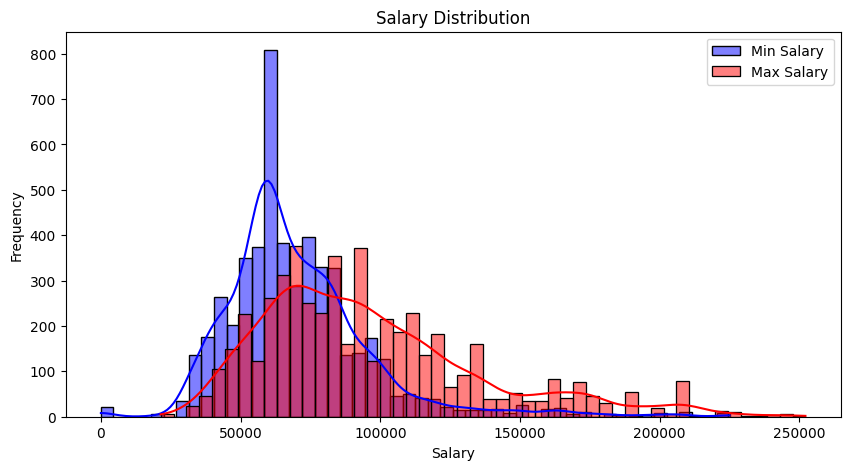

In [ ]:
#Histogram for salary distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Salary Range From'], bins=50, kde=True, color='blue', label='Min Salary')
sns.histplot(df['Salary Range To'], bins=50, kde=True, color='red', label='Max Salary')
plt.legend()
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### Winsorization and Log transform can be used for outliers.

In [ ]:
#Winsorize 'Salary Range From' and 'Salary Range To'
df['Salary Range From'] = winsorize(df['Salary Range From'], limits=[0.05, 0.05])
df['Salary Range To'] = winsorize(df['Salary Range To'], limits=[0.05, 0.05])

In [ ]:
#Log transform
df['log_Salary_From'] = np.log1p(df['Salary Range From'])
df['log_Salary_To'] = np.log1p(df['Salary Range To'])

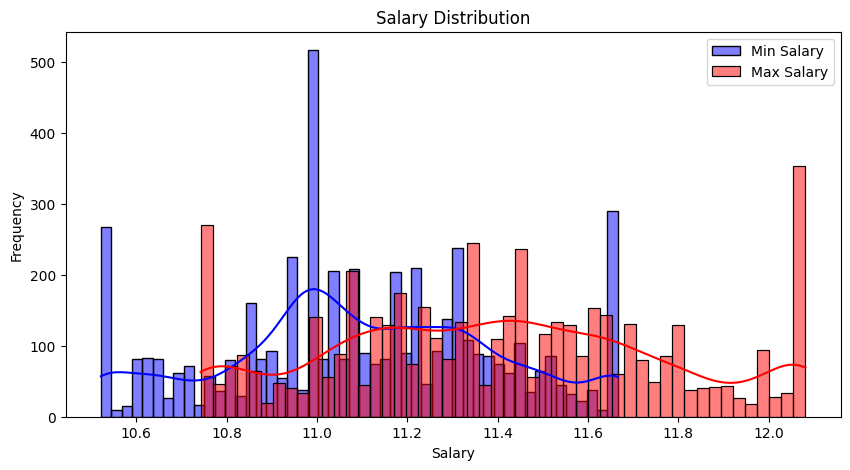

In [ ]:
#Verify transformation
#Histograms for Salary Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['log_Salary_From'], bins=50, kde=True, color='blue', label='Min Salary')
sns.histplot(df['log_Salary_To'], bins=50, kde=True, color='red', label='Max Salary')
plt.legend()
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

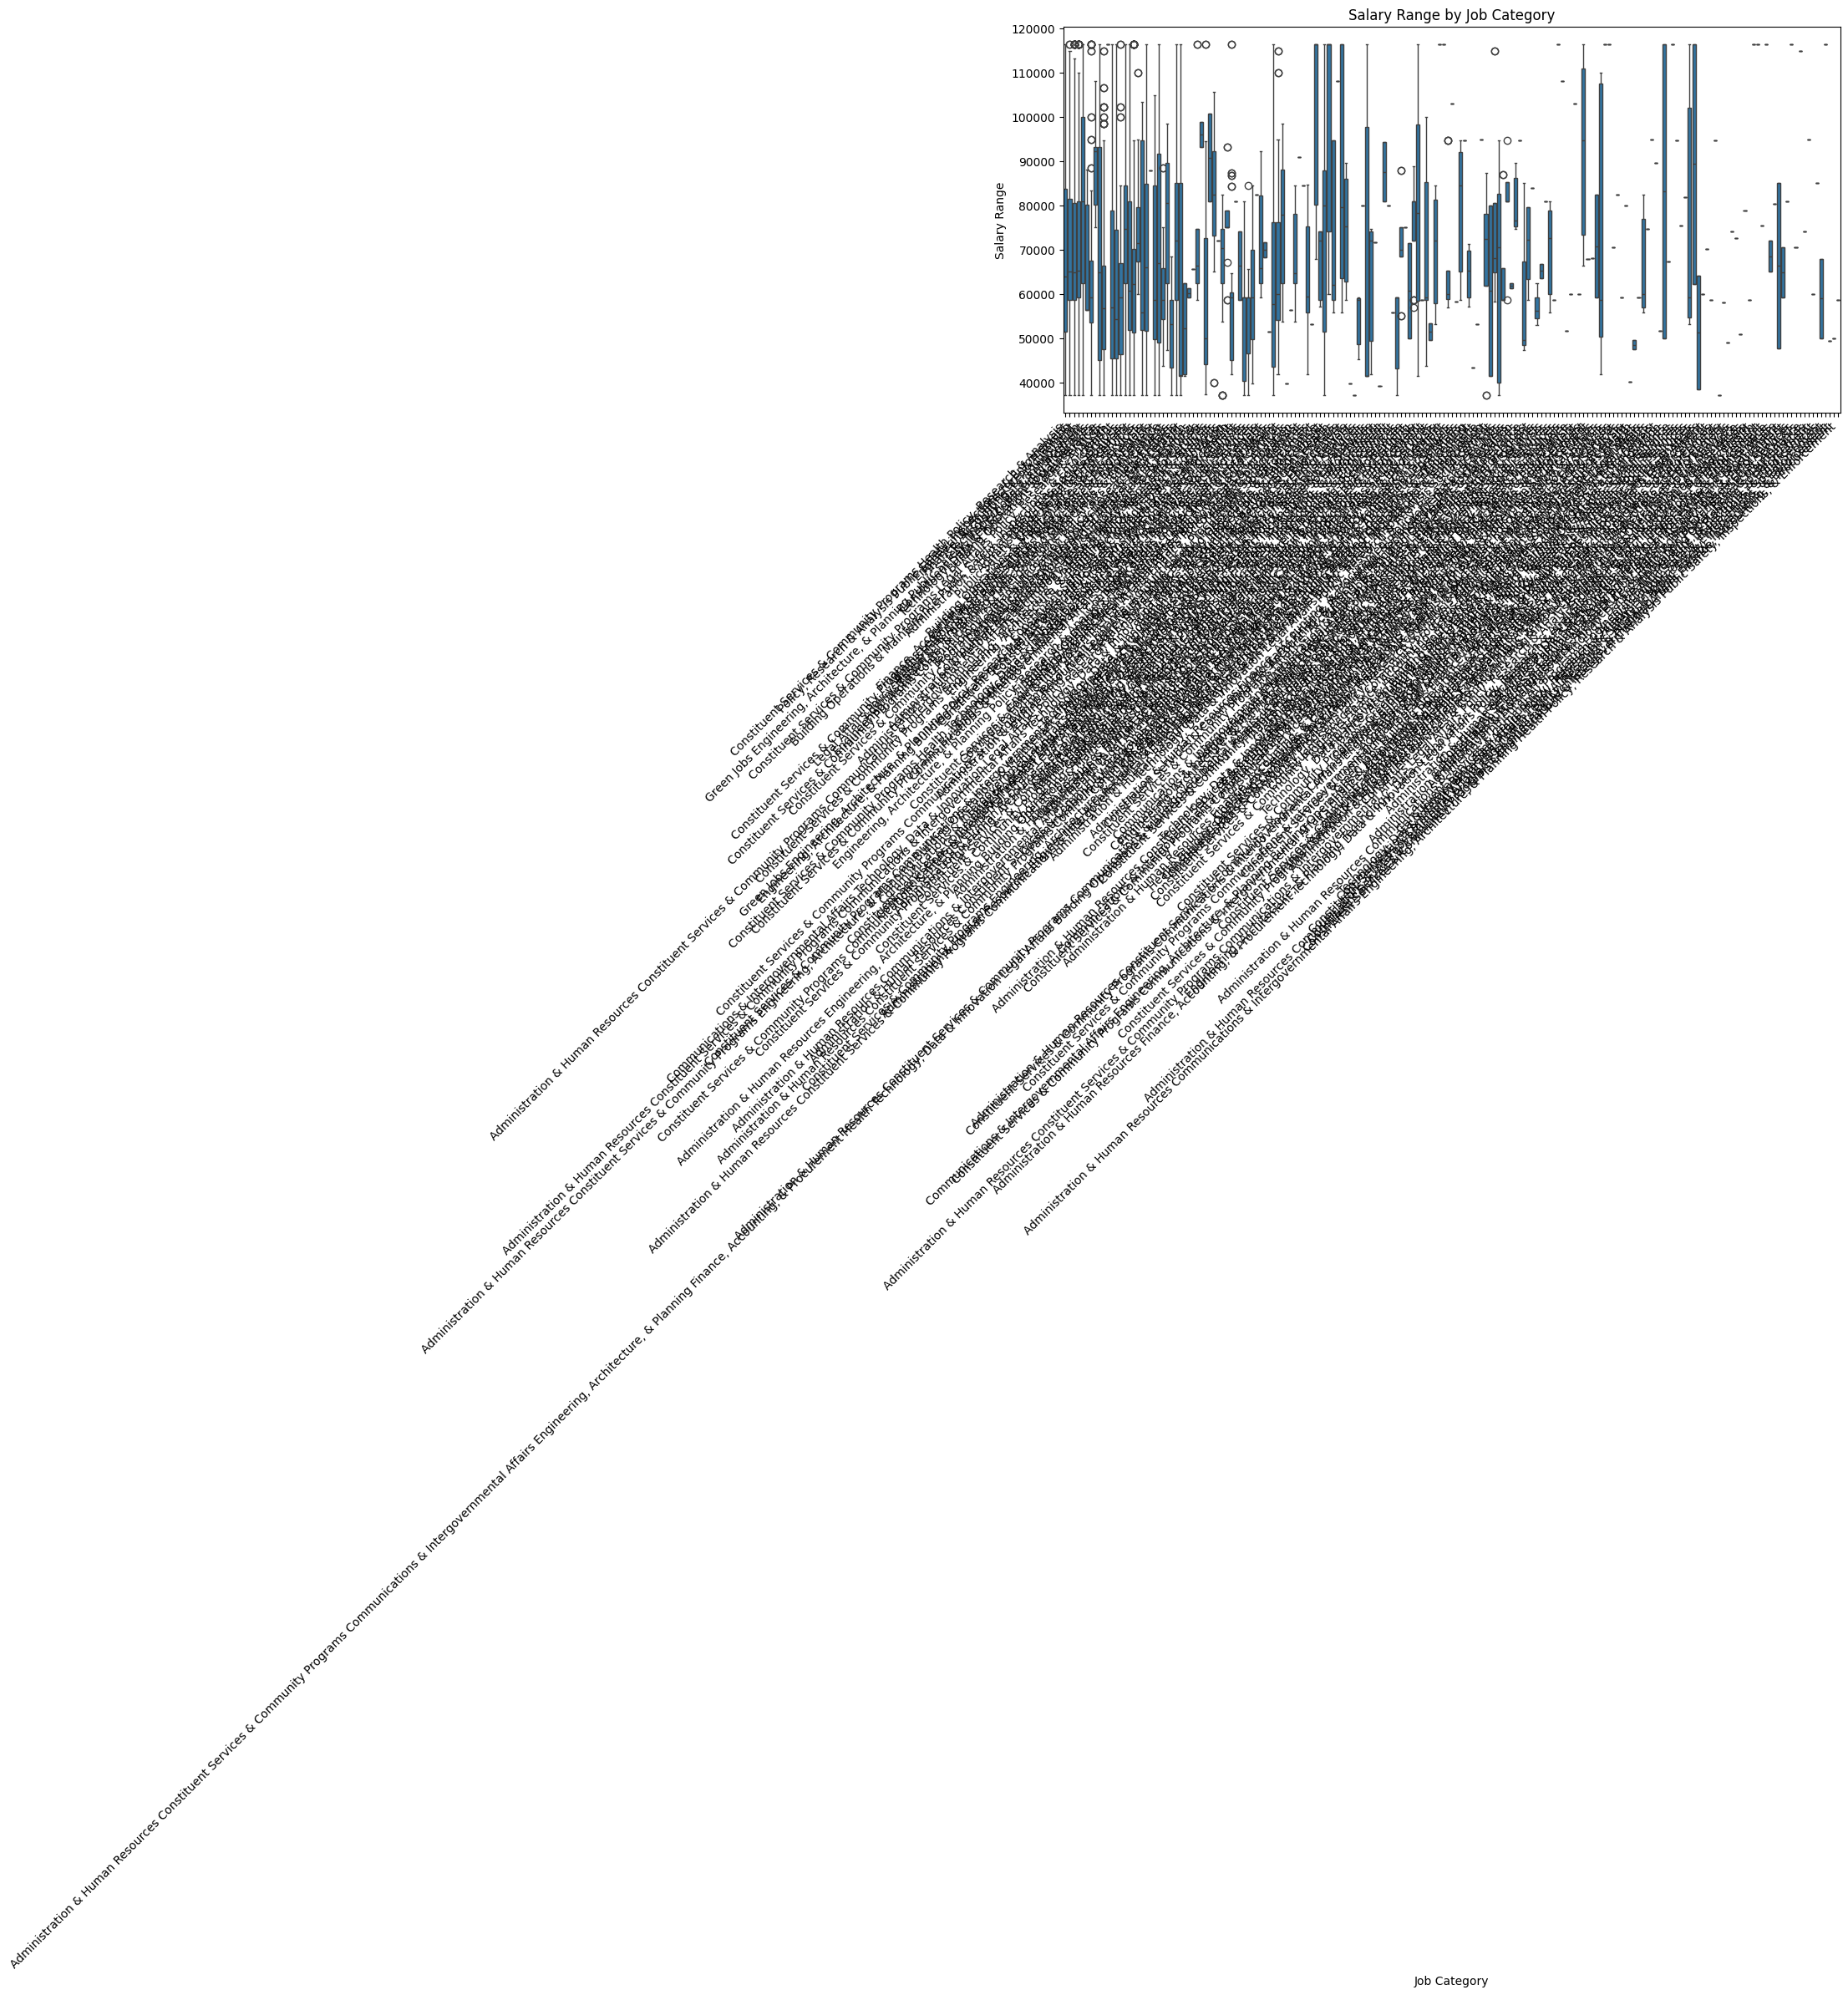

In [ ]:
#Box Plots for Salary by Job Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Category', y='Salary Range From', data=df)
plt.title('Salary Range by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary Range')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels for better readability
plt.show()

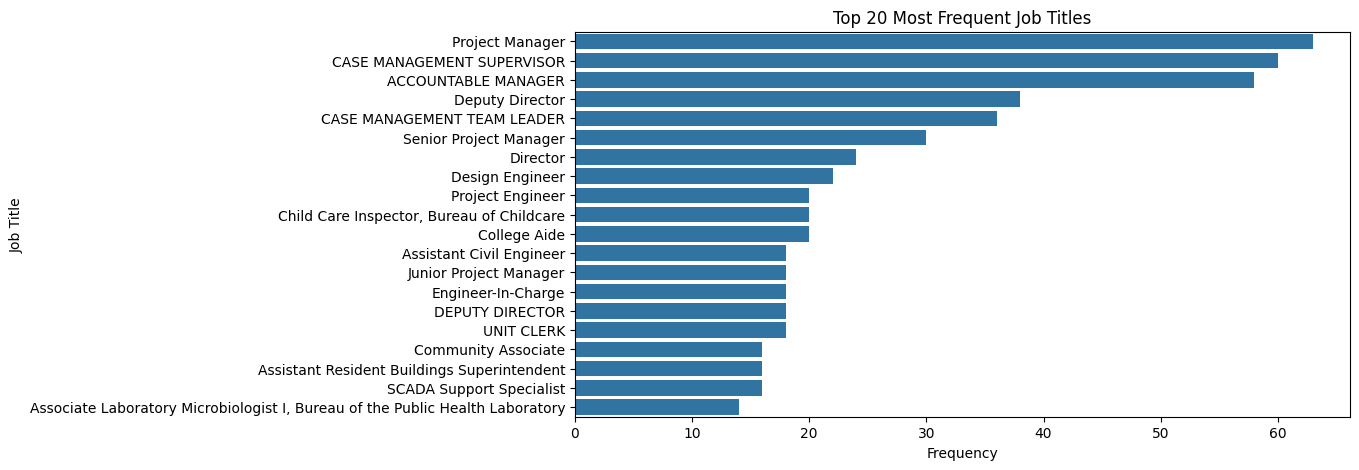

In [ ]:
#Bar Charts for Job Title Frequency
plt.figure(figsize=(10, 5))
sns.countplot(y='Business Title', data=df, order=df['Business Title'].value_counts().index[:20])  #Show top 20
plt.title('Top 20 Most Frequent Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

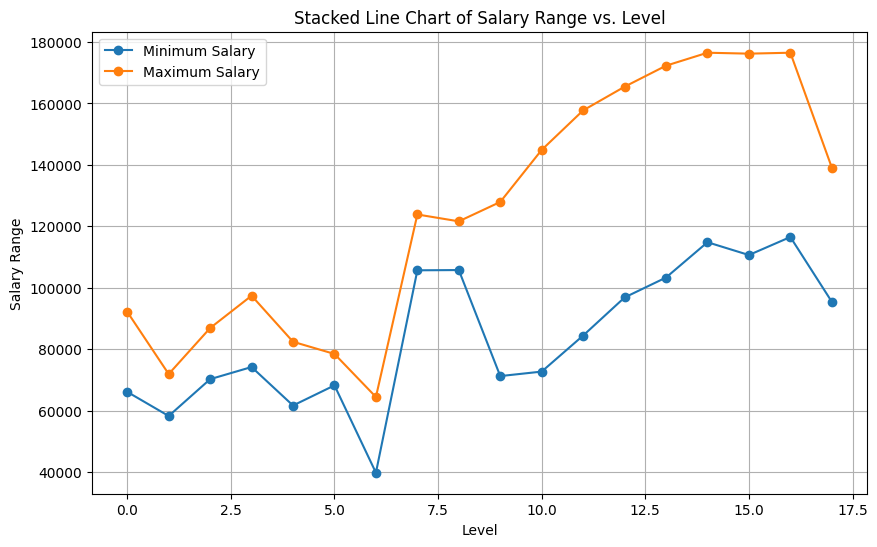

In [ ]:
#Group data by level and calculate mean salary ranges
salary_by_level = df.groupby('Level').agg({'Salary Range From': 'mean', 'Salary Range To': 'mean'})

#Create the stacked line chart for Level vs Salary Range
plt.figure(figsize=(10, 6))
plt.plot(salary_by_level.index, salary_by_level['Salary Range From'], label='Minimum Salary', marker='o')
plt.plot(salary_by_level.index, salary_by_level['Salary Range To'], label='Maximum Salary', marker='o')

plt.xlabel('Level')
plt.ylabel('Salary Range')
plt.title('Stacked Line Chart of Salary Range vs. Level')
plt.legend()
plt.grid(True)
plt.show()

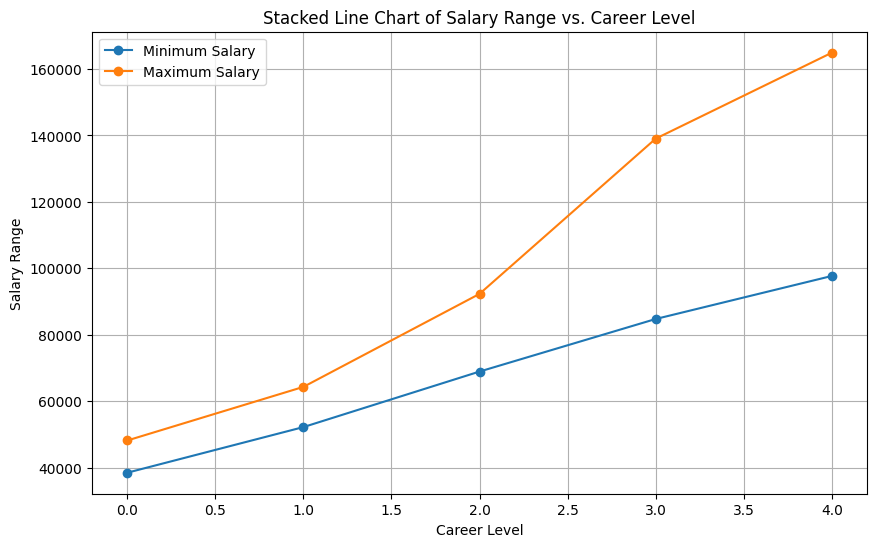

In [ ]:
#Group data by level and calculate mean salary ranges
salary_by_career_level = df.groupby('Career Level').agg({'Salary Range From': 'mean', 'Salary Range To': 'mean'})

#Create the stacked line chart for Career Level vs Salary Range
plt.figure(figsize=(10, 6))
plt.plot(salary_by_career_level.index, salary_by_career_level['Salary Range From'], label='Minimum Salary', marker='o')
plt.plot(salary_by_career_level.index, salary_by_career_level['Salary Range To'], label='Maximum Salary', marker='o')

plt.xlabel('Career Level')
plt.ylabel('Salary Range')
plt.title('Stacked Line Chart of Salary Range vs. Career Level')
plt.legend()
plt.grid(True)
plt.show()

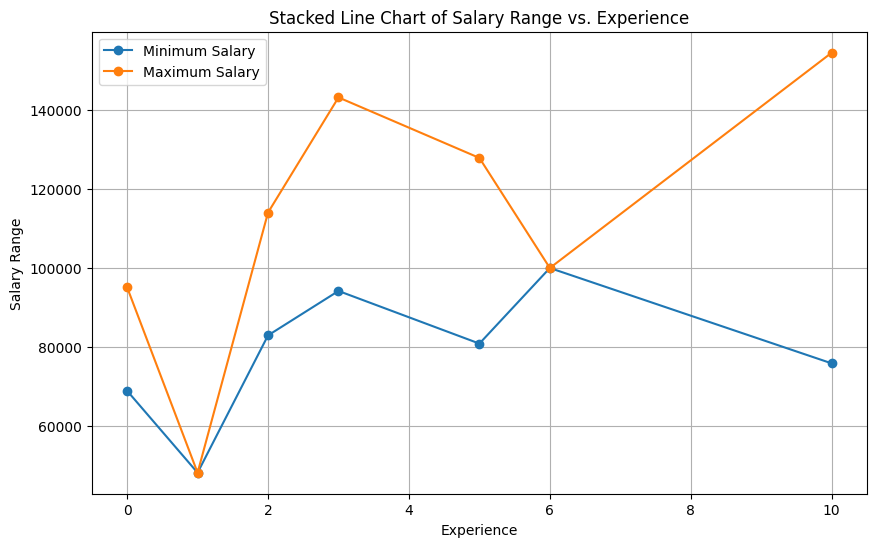

In [ ]:
#Group data by level and calculate mean salary ranges
salary_by_Experience = df.groupby('Experience').agg({'Salary Range From': 'mean', 'Salary Range To': 'mean'})

#Create the stacked line chart for Career Level vs Salary Range
plt.figure(figsize=(10, 6))
plt.plot(salary_by_Experience.index, salary_by_Experience['Salary Range From'], label='Minimum Salary', marker='o')
plt.plot(salary_by_Experience.index, salary_by_Experience['Salary Range To'], label='Maximum Salary', marker='o')

plt.xlabel('Experience')
plt.ylabel('Salary Range')
plt.title('Stacked Line Chart of Salary Range vs. Experience')
plt.legend()
plt.grid(True)
plt.show()

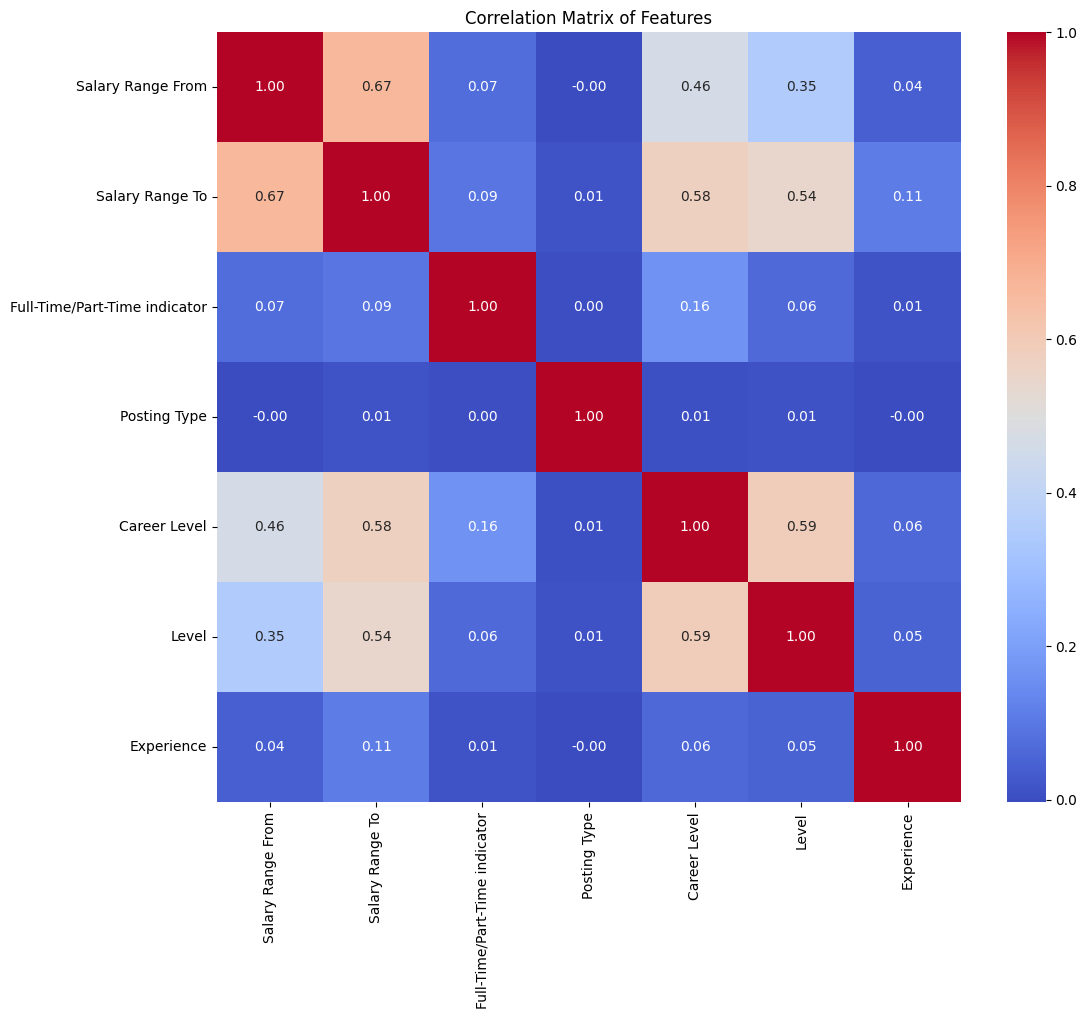

In [ ]:
#Check for correlation

df_corr = df[['Salary Range From', 'Salary Range To', 'Full-Time/Part-Time indicator', 'Posting Type', 'Career Level', 'Level', 'Experience']]
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# **Natural Language Processing (NLP)**

In [ ]:
df.columns

Index(['Agency', 'Posting Type', 'Business Title', 'Civil Service Title',
       'Level', 'Job Category', 'Full-Time/Part-Time indicator',
       'Career Level', 'Salary Range From', 'Salary Range To', 'Work Location',
       'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements',
       'Preferred Skills', 'Additional Information', 'Experience',
       'Title Classification_Exempt-4', 'Title Classification_Labor-3',
       'Title Classification_Non-Competitive-5',
       'Title Classification_Pending Classification-2', 'log_Salary_From',
       'log_Salary_To'],
      dtype='object')

In [ ]:
#Define Text Columns
text_columns = [ 'Agency', 'Business Title', 'Civil Service Title', 'Work Location','Job Category', 'Division/Work Unit',
                'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information']

In [ ]:
#Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  #Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  #Remove special characters
    tokens = word_tokenize(text)  #Tokenize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  #Lemmatization & Stopword Removal
    return " ".join(tokens)

#Apply cleaning function
for col in text_columns:
    df[col] = df[col].apply(clean_text)

In [ ]:
#Combine text features
df['combined_text'] = df['Agency'] + " " + df['Business Title'] + " " + df['Civil Service Title'] + " " + df['Job Category']  + " " + df['Work Location'] + " " + df['Division/Work Unit'] + " " + df['Job Description'] + " " + df['Minimum Qual Requirements'] + " " + df['Preferred Skills'] + " " + df['Additional Information']
df.drop(columns=text_columns, inplace=True)

### Feature Extraction (Convert Text to Numerical Data)

Word2Vec model

In [ ]:
#Train Word2Vec model
sentences = [text.split() for text in df['combined_text']] #Create sentences
model = Word2Vec(sentences, min_count=1, vector_size=100) #Train

#Get word embeddings
def get_word_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in model.wv.key_to_index:
            embeddings.append(model.wv[word])
        else:
            embeddings.append(np.zeros(100)) #Handling out-of-vocabulary words
    return np.mean(embeddings, axis=0) #Average the embeddings of all words in the text

#Apply to your text column
df_emb = df.copy()
df_emb['word_embeddings'] = df['combined_text'].apply(get_word_embeddings)

In [ ]:
#Flatten the word embeddings
word_embeddings_df = pd.DataFrame(df_emb['word_embeddings'].tolist(), index=df_emb.index)
word_embeddings_df.columns = [f'embedding_{i}' for i in range(word_embeddings_df.shape[1])]

#Concatenate the flattened embeddings with the rest of the features
df_emb = pd.concat([df_emb, word_embeddings_df], axis=1)
df_emb.drop(columns=['word_embeddings', 'combined_text'], inplace=True)  #Remove the original column

### Polynomial Interactions

In [ ]:
#Polynomial and interaction
features = ['Full-Time/Part-Time indicator', 'Posting Type', 'Career Level', 'Level', 'Experience']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

#Create polynomial and interaction features (degree=2 captures pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[features])
poly_feature_names = poly.get_feature_names_out(features)

#Convert to DataFrame and merge with original data
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
df = pd.concat([df, df_poly], axis=1)

# **Split Data into Train & Test Sets**

In [ ]:
# Define features (X) and target variable (y)
X = df_emb.drop(columns=['Salary Range From', 'Salary Range To', 'log_Salary_From', 'log_Salary_To'], axis=1)  #Drop target columns
y = df_emb[['log_Salary_From', 'log_Salary_To']]  #Predicting both min & max salary

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Training**

### Linear Regressor

In [ ]:
#Initialize and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_lr_inv = np.expm1(y_pred_lr)
y_test_inv = np.expm1(y_test)

Linear Regression - MAE: 13391.01, MSE: 349365938.69, RMSE: 18691.33, R-squared: 0.56


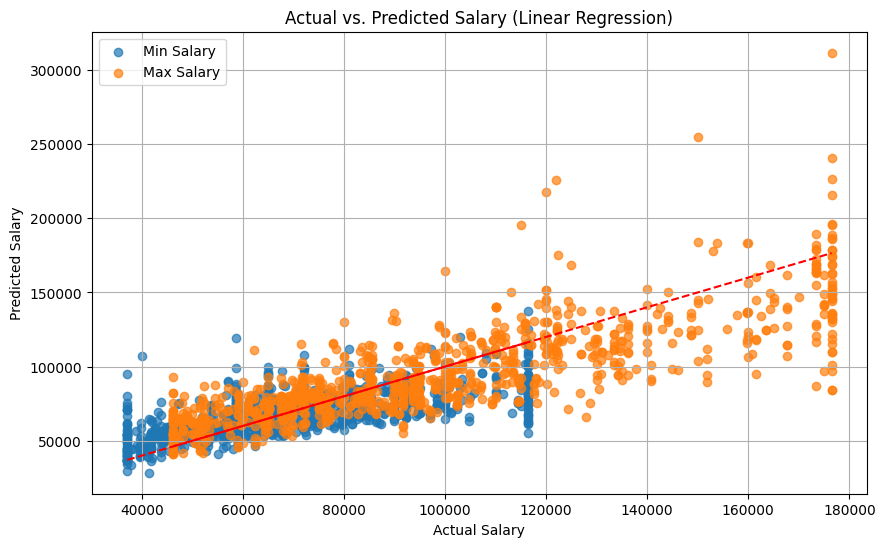

In [ ]:
#Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test_inv, y_pred_lr_inv)
mse_lr = mean_squared_error(y_test_inv, y_pred_lr_inv)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_inv, y_pred_lr_inv)

print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R-squared: {r2_lr:.2f}")

#Visualize actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_lr_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_lr_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

### RandomForest Regressor

In [ ]:
#Initialize and train a RandomForest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
#Inverse Log transformation for predictions
y_pred_rf_inv = np.expm1(y_pred_rf)

RandomForest Regression - MAE: 5245.67, MSE: 75199278.40, RMSE: 8671.75, R-squared: 0.90


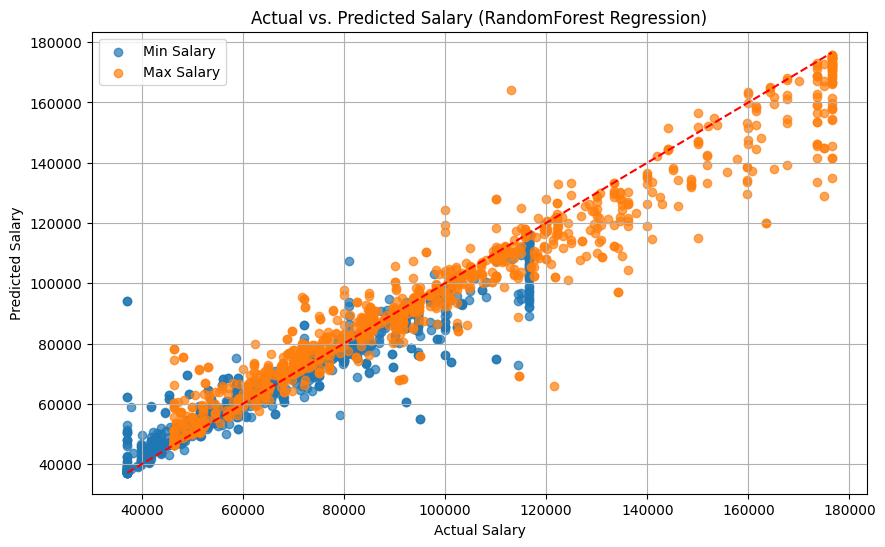

In [ ]:
# Evaluate the RandomForest Regression model
mae_rf = mean_absolute_error(y_test_inv, y_pred_rf_inv)
mse_rf = mean_squared_error(y_test_inv, y_pred_rf_inv)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_inv, y_pred_rf_inv)

print(f"RandomForest Regression - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, R-squared: {r2_rf:.2f}")

# Visualize actual vs. predicted values for RandomForest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_rf_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_rf_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (RandomForest Regression)")
plt.legend()
plt.grid(True)
plt.show()

### RandomForest Regressor with Hyperparameter Tuning

In [ ]:
#Tuned RandomForest Regressor
#Define a parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Set up GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid_rf,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=1)

#Fit GridSearchCV on the training data
grid_search_rf.fit(X_train_scaled, y_train)

#Retrieve the best estimator and parameters
print("Best parameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_


#Predict on the test set using the best RandomForest model
y_pred_rf_hpt = best_rf.predict(X_test_scaled)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py",

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
#Inverse Log transformation for predictions
y_pred_rf_hpt_inv = np.expm1(y_pred_rf_hpt)

RandomForest Regression - MAE: 5916.22, MSE: 88521576.82, RMSE: 9408.59, R-squared: 0.89


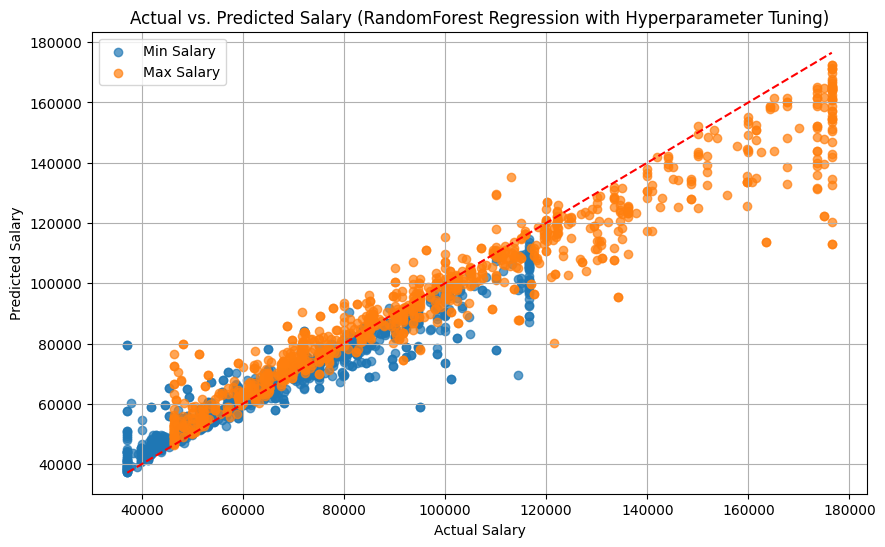

In [ ]:
#Evaluate the RandomForest Regression model (with Hyperparameter Tuning)
mae_rf_hpt = mean_absolute_error(y_test_inv, y_pred_rf_hpt_inv)
mse_rf_hpt = mean_squared_error(y_test_inv, y_pred_rf_hpt_inv)
rmse_rf_hpt = np.sqrt(mse_rf_hpt)
r2_rf_hpt = r2_score(y_test_inv, y_pred_rf_hpt_inv)

print(f"RandomForest Regression - MAE: {mae_rf_hpt:.2f}, MSE: {mse_rf_hpt:.2f}, RMSE: {rmse_rf_hpt:.2f}, R-squared: {r2_rf_hpt:.2f}")

#Visualize actual vs. predicted values for RandomForest Regression (with Hyperparameter Tuning)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_rf_hpt_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_rf_hpt_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (RandomForest Regression with Hyperparameter Tuning)")
plt.legend()
plt.grid(True)
plt.show()

### XGBoost Regressor

In [ ]:
#Initialize the XGBoost regressor
xgb= xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#Train the model on your training data
xgb.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred_xgb = xgb.predict(X_test_scaled)

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_xgb_inv = np.expm1(y_pred_xgb)

XGBoost Regression - MAE: 2914.74, MSE: 42750028.00, RMSE: 6538.35, R-squared: 0.94


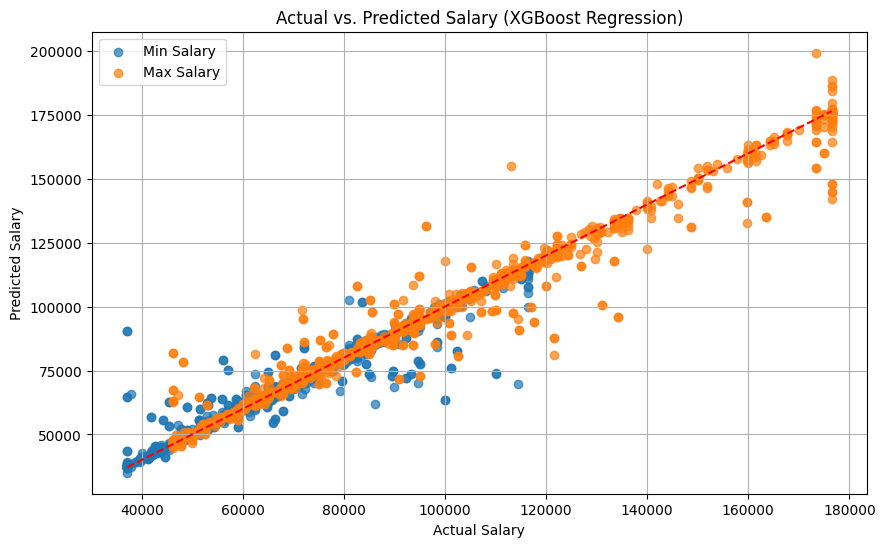

In [ ]:
#Evaluate the XGBoost Regression model
mae_xgb = mean_absolute_error(y_test_inv, y_pred_xgb_inv)
mse_xgb = mean_squared_error(y_test_inv, y_pred_xgb_inv)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_inv, y_pred_xgb_inv)

print(f"XGBoost Regression - MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R-squared: {r2_xgb:.2f}")


#Visualize actual vs. predicted values for XGBoost Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_xgb_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_xgb_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (XGBoost Regression)")
plt.legend()
plt.grid(True)
plt.show()

### XGBoost Regressor with Hyperparameter Tuning

In [ ]:
#Define a parameter grid for hyperparameter tuning
param_grid_xgb = {
  'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8 ,1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
#Set up GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb,
                               param_grid=param_grid_xgb,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               verbose=1)

#Fit GridSearchCV on the training data
grid_search_xgb.fit(X_train_scaled, y_train)

#Retrieve the best estimator and parameters
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_


#Predict on the test set using the best XGBoost model
y_pred_xgb_hpt = best_xgb.predict(X_test_scaled)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}


In [ ]:
#Inverse Log transformation for predictions
y_pred_xgb_hpt_inv = np.expm1(y_pred_xgb_hpt)

RandomForest Regression - MAE: 2501.09, MSE: 38537940.00, RMSE: 6207.89, R-squared: 0.94


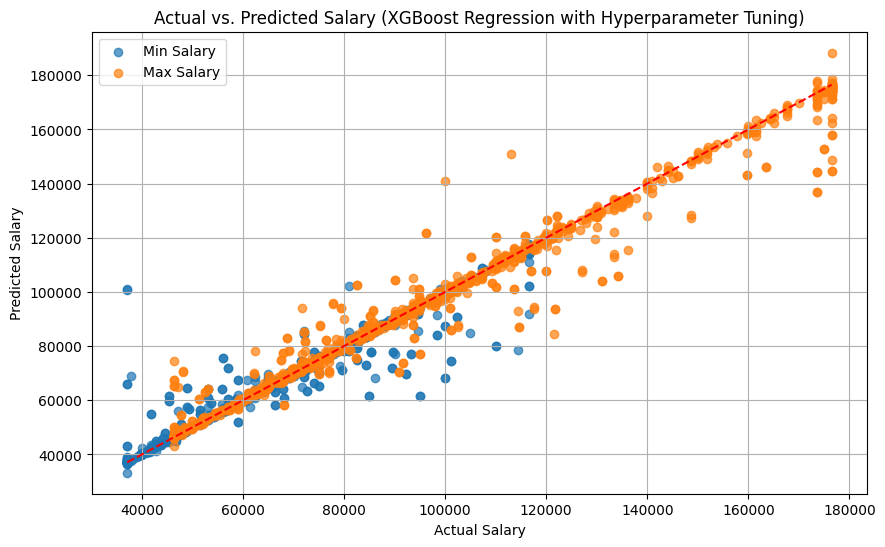

In [ ]:
#Evaluate the XGBoost Regression model (with Hyperparameter Tuning)
mae_xgb_hpt = mean_absolute_error(y_test_inv, y_pred_xgb_hpt_inv)
mse_xgb_hpt = mean_squared_error(y_test_inv, y_pred_xgb_hpt_inv)
rmse_xgb_hpt = np.sqrt(mse_xgb_hpt)
r2_xgb_hpt = r2_score(y_test_inv, y_pred_xgb_hpt_inv)

print(f"RandomForest Regression - MAE: {mae_xgb_hpt:.2f}, MSE: {mse_xgb_hpt:.2f}, RMSE: {rmse_xgb_hpt:.2f}, R-squared: {r2_xgb_hpt:.2f}")

#Visualize actual vs. predicted values for XGBoost Regression (with Hyperparameter Tuning)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_xgb_hpt_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_xgb_hpt_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (XGBoost Regression with Hyperparameter Tuning)")
plt.legend()
plt.grid(True)
plt.show()

### MLP Regressor

In [ ]:
#Initialize and train the MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

#Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

In [ ]:
#Inverse log transformation for predictions
y_pred_mlp_inv = np.expm1(y_pred_mlp)

RandomForest Regression - MAE: 15115.23, MSE: 804992618.91, RMSE: 28372.39, R-squared: 0.01


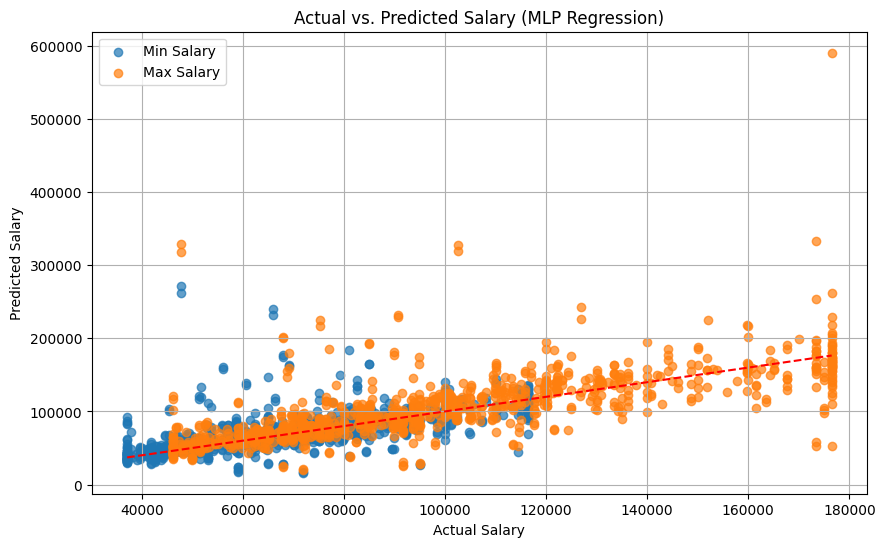

In [74]:
#Evaluate the MLP Regression model
mae_mlp = mean_absolute_error(y_test_inv, y_pred_mlp_inv)
mse_mlp = mean_squared_error(y_test_inv, y_pred_mlp_inv)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test_inv, y_pred_mlp_inv)

print(f"RandomForest Regression - MAE: {mae_mlp:.2f}, MSE: {mse_mlp:.2f}, RMSE: {rmse_mlp:.2f}, R-squared: {r2_mlp:.2f}")

#Visualize actual vs. predicted values for MLP Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_mlp_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_mlp_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (MLP Regression)")
plt.legend()
plt.grid(True)
plt.show()

###Deep Learning Model

In [ ]:
#Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),  #Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)  #Output layer with 2 units for 'log_Salary_From' and 'log_Salary_To'
])

#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Mean Squared Error and Mean Absolute Error

#Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

#Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Deep Learning Model - Loss: {loss:.2f}, MAE: {mae:.2f}")

#Make predictions
y_pred_dl = model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 64.5486 - mae: 7.0612 - val_loss: 2.8411 - val_mae: 1.3376
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8636 - mae: 1.7482 - val_loss: 1.6691 - val_mae: 1.0088
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5888 - mae: 1.5050 - val_loss: 1.2272 - val_mae: 0.8660
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7932 - mae: 1.3291 - val_loss: 1.1098 - val_mae: 0.8318
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4004 - mae: 1.2359 - val_loss: 0.9945 - val_mae: 0.7950
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1031 - mae: 1.1482 - val_loss: 0.9723 - val_mae: 0.7853
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9315 - mae: 1.1012 - val_loss: 0.9738 - val_mae: 0.7935
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7140 - mae: 1.0430 - val_loss: 0.7894 - val_mae: 0.7093
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - l

In [ ]:
#Inverse log transformation for predictions and test data
y_pred_dl_inv = np.expm1(y_pred_dl)

Deep Learning Regression - MAE: 36189.48, MSE: 1878551552.00, RMSE: 43342.26, R-squared: -1.29


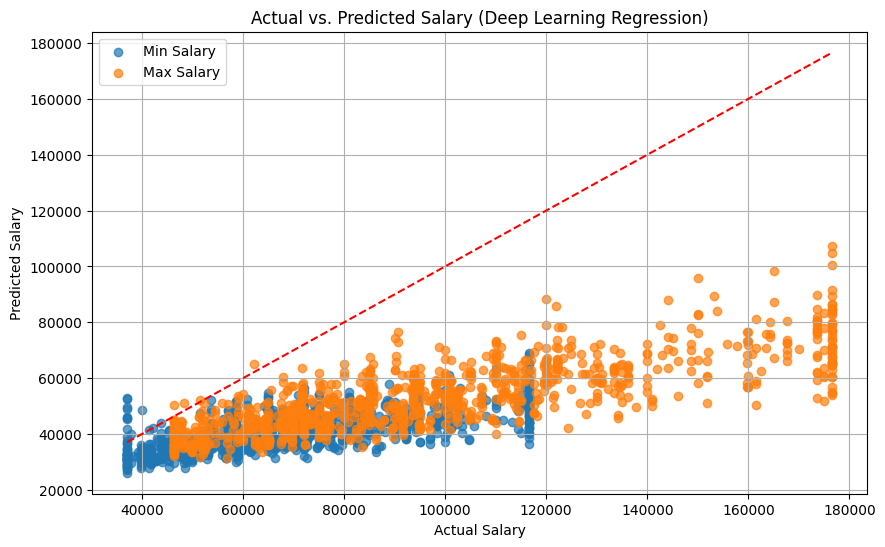

In [ ]:
#Evaluate the Deep Learning model
mae_dl = mean_absolute_error(y_test_inv, y_pred_dl_inv)
mse_dl = mean_squared_error(y_test_inv, y_pred_dl_inv)
rmse_dl = np.sqrt(mse_dl)
r2_dl = r2_score(y_test_inv, y_pred_dl_inv)

print(f"Deep Learning Regression - MAE: {mae_dl:.2f}, MSE: {mse_dl:.2f}, RMSE: {rmse_dl:.2f}, R-squared: {r2_dl:.2f}")

#Visualize actual vs. predicted values for Deep Learning Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_dl_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_dl_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (Deep Learning Regression)")
plt.legend()
plt.grid(True)
plt.show()

###Compare Model Performances

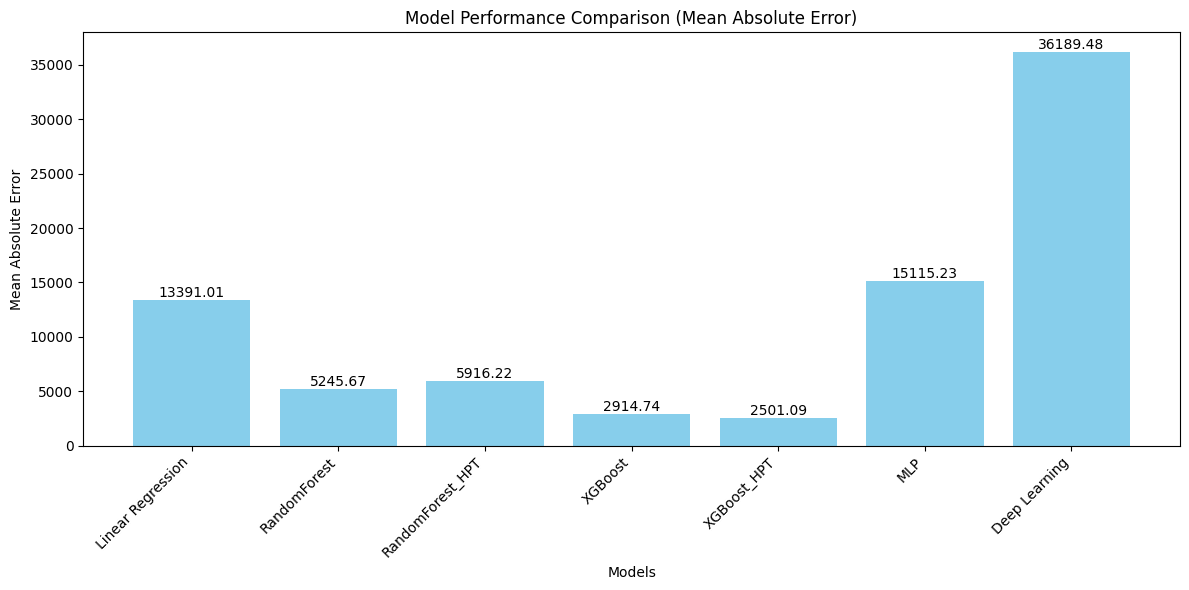

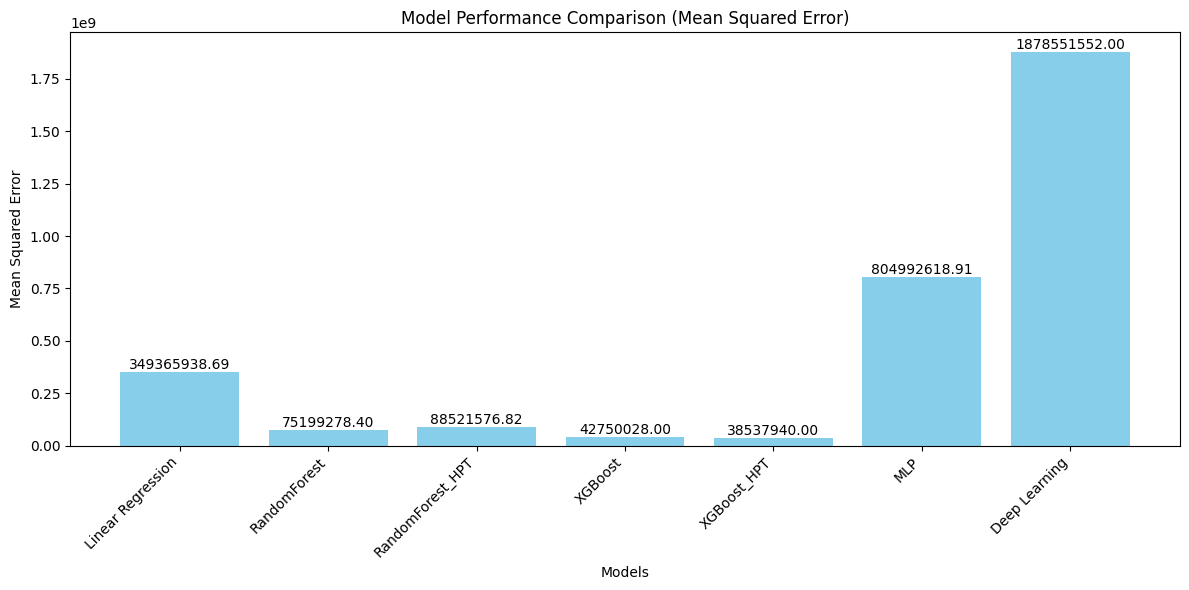

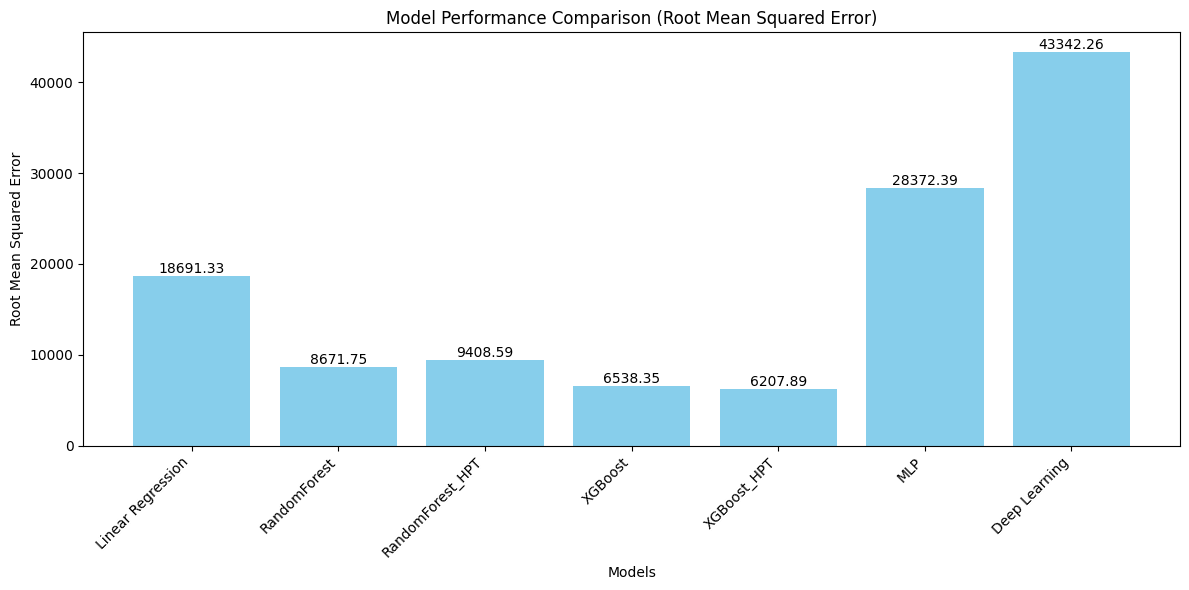

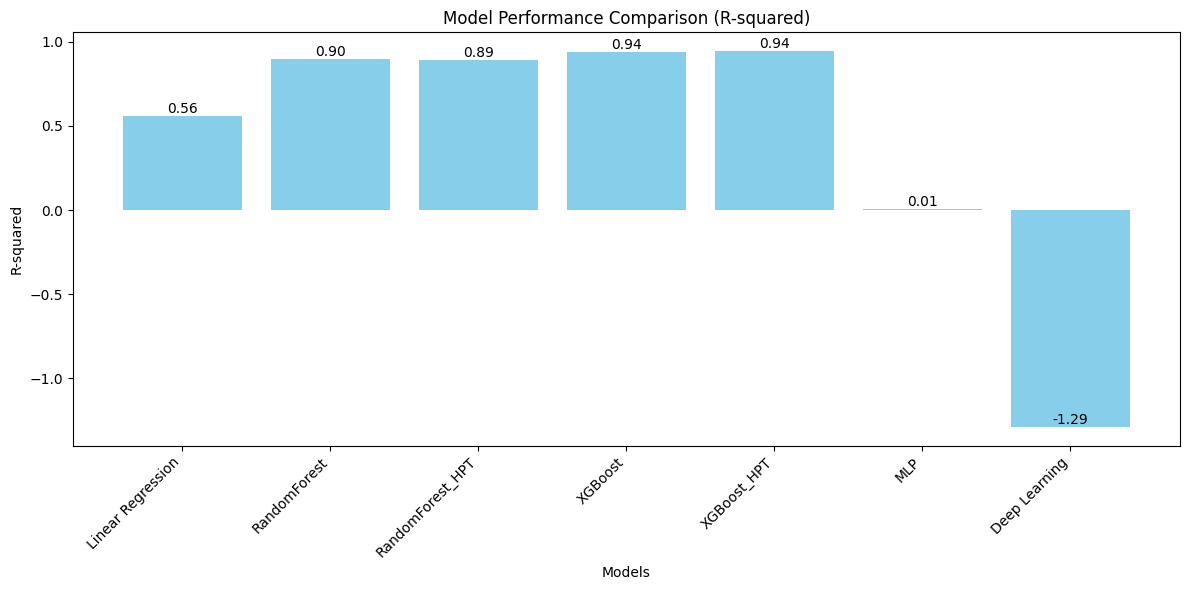

The best model based on RMSE is: XGBoost_HPT


In [ ]:
#Compare model performances

models = ['Linear Regression', 'RandomForest', 'RandomForest_HPT', 'XGBoost', 'XGBoost_HPT', 'MLP', 'Deep Learning']
mae_scores = [mae_lr, mae_rf, mae_rf_hpt, mae_xgb, mae_xgb_hpt, mae_mlp, mae_dl]
mse_scores = [mse_lr, mse_rf, mse_rf_hpt, mse_xgb, mse_xgb_hpt, mse_mlp, mse_dl]
rmse_scores = [rmse_lr, rmse_rf, rmse_rf_hpt, rmse_xgb, rmse_xgb_hpt, rmse_mlp, rmse_dl]
r2_scores = [r2_lr, r2_rf, r2_rf_hpt, r2_xgb, r2_xgb_hpt, r2_mlp, r2_dl]


#Function to create bar plot with values
def plot_performance(metric, scores, metric_name):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, scores, color='skyblue')
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"Model Performance Comparison ({metric_name})")
    plt.xticks(rotation=45, ha='right') #Rotate for readability

    #Add value labels on top of each bar
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{score:.2f}', ha='center', va='bottom')

    plt.tight_layout()  #Adjust layout to prevent labels from overlapping
    plt.show()


plot_performance("MAE", mae_scores, "Mean Absolute Error")
plot_performance("MSE", mse_scores, "Mean Squared Error")
plot_performance("RMSE", rmse_scores, "Root Mean Squared Error")
plot_performance("R-squared", r2_scores, "R-squared")


#Determine the best model based on a chosen metric (e.g., RMSE)
best_model_index = np.argmin(rmse_scores)  # Choose the model with the lowest RMSE
best_model = models[best_model_index]
print(f"The best model based on RMSE is: {best_model}")


Given the evaluation results, the **XGBoost model with hyperparameter tuning**(**XGBoost_HPT**)is the most suitable choice for this salary prediction task. It strikes the best balance between accuracy and robustness, outperforming all other models in both R² and RMSE metrics. Now that the model has been selected, **SHAP or SHapley Additive exPlanations** can be used to improve or enhanced the model.

#**Refining the model**

###SHAP Explainer

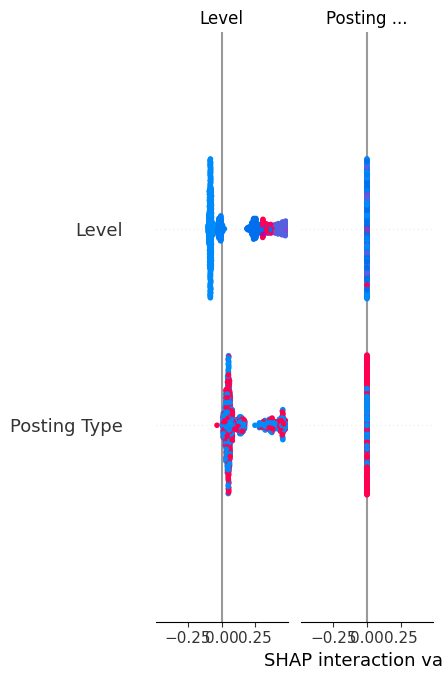

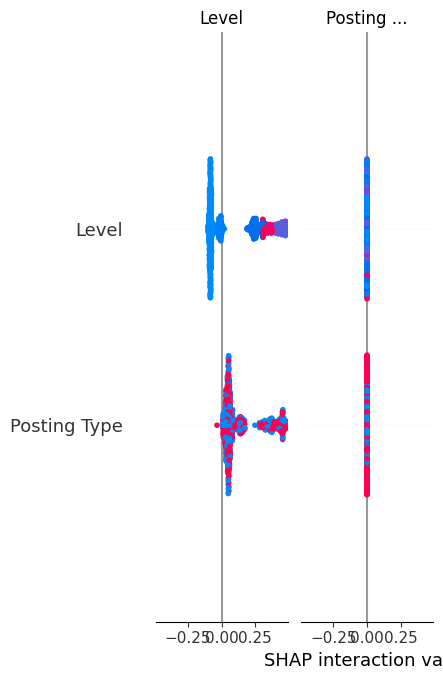

In [ ]:
#Initialize Shap explainer
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

#Visualize SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [ ]:
#Identify the least important feature based on SHAP values
importances = np.abs(shap_values).mean(0)
least_important_feature_index = np.argmin(importances)
least_important_feature = X_test.columns[least_important_feature_index]

#Remove the least important feature and retrain and evaluate the model
X_train_shap = X_train.drop(columns=[least_important_feature])
X_test_shap = X_test.drop(columns=[least_important_feature])

#Re-scale data after dropping the feature
X_train_shap_scaled = scaler.fit_transform(X_train_shap)
X_test_shap_scaled = scaler.transform(X_test_shap)



In [ ]:
#Train the model on your reduced training data
xgb_shap = xgb.fit(X_train_shap_scaled, y_train)

#Predict on the test set
y_pred_xgb_shap = xgb.predict(X_test_shap_scaled)

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_xgb_inv_shap = np.expm1(y_pred_xgb_shap)

XGBoost Regression - MAE: 2917.54, MSE: 40401764.00, RMSE: 6356.24, R-squared: 0.94


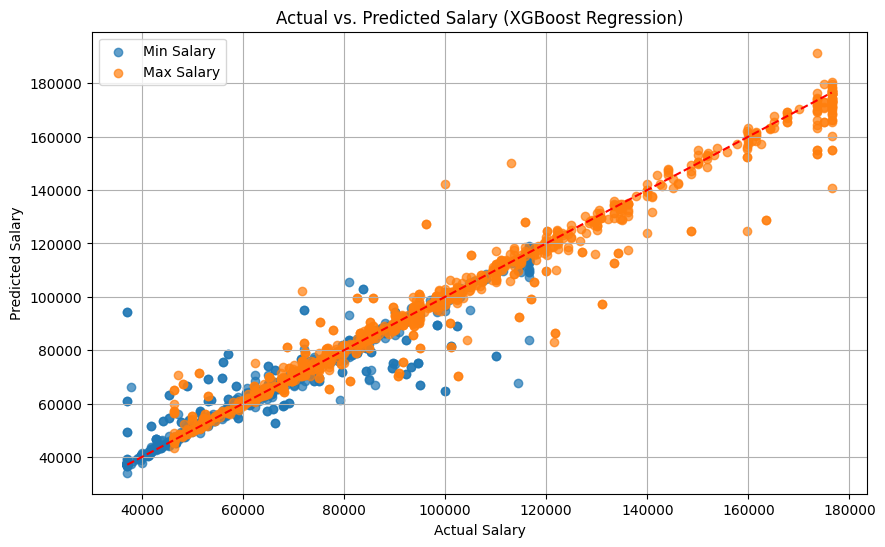

In [ ]:
#Evaluate the XGBoost Regression model (with Hyperparameter Tuning)
mae_xgb_shap = mean_absolute_error(y_test_inv, y_pred_xgb_inv_shap)
mse_xgb_shap = mean_squared_error(y_test_inv, y_pred_xgb_inv_shap)
rmse_xgb_shap = np.sqrt(mse_xgb_shap)
r2_xgb_shap = r2_score(y_test_inv, y_pred_xgb_inv_shap)

print(f"XGBoost Regression - MAE: {mae_xgb_shap:.2f}, MSE: {mse_xgb_shap:.2f}, RMSE: {rmse_xgb_shap:.2f}, R-squared: {r2_xgb_shap:.2f}")


#Visualize actual vs. predicted values for XGBoost Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_xgb_inv_shap[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_xgb_inv_shap[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (XGBoost Regression)")
plt.legend()
plt.grid(True)
plt.show()

Try Hyperparameter Tuning again with the reduced train data using SHAP

In [ ]:
#Set up GridSearchCV for hyperparameter tuning
grid_search_xgb_shap = GridSearchCV(estimator=xgb,
                               param_grid=param_grid_xgb,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               verbose=1)

#Fit GridSearchCV on the training data
grid_search_xgb_shap.fit(X_train_shap_scaled, y_train)

#Retrieve the best estimator and parameters
print("Best parameters for XGBoost:", grid_search_xgb_shap.best_params_)
best_xgb_shap = grid_search_xgb_shap.best_estimator_


#Predict on the test set using the best XGBoost model
y_pred_xgb_hpt = best_xgb_shap.predict(X_test_shap_scaled)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


In [ ]:
#Inverse Log transformation for predictions
y_pred_xgb_hpt_shap_inv = np.expm1(y_pred_xgb_hpt)

RandomForest Regression - MAE: 2291.84, MSE: 37641636.00, RMSE: 6135.28, R-squared: 0.95


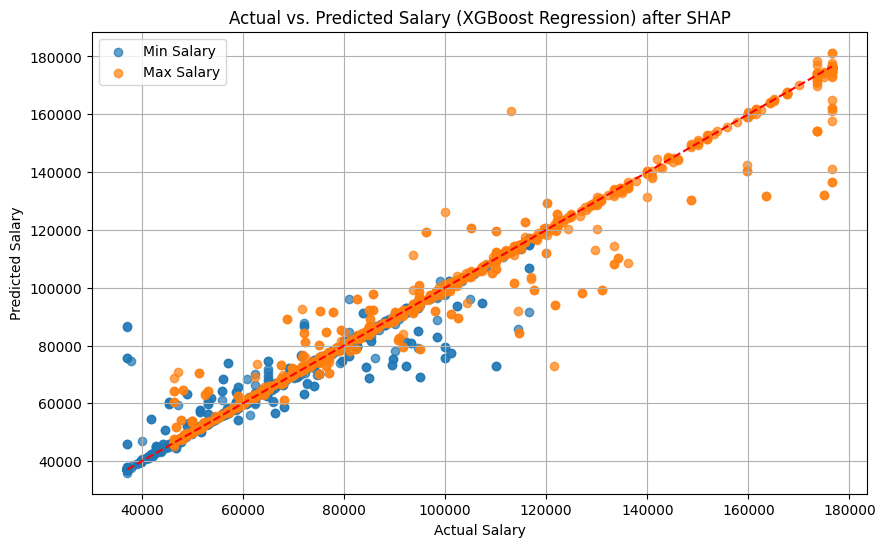

In [ ]:
#Evaluate the XGBoost Regression model (with Hyperparameter Tuning)
mae_xgb_hpt_shap = mean_absolute_error(y_test_inv, y_pred_xgb_hpt_shap_inv)
mse_xgb_hpt_shap = mean_squared_error(y_test_inv, y_pred_xgb_hpt_shap_inv)
rmse_xgb_hpt_shap = np.sqrt(mse_xgb_hpt_shap)
r2_xgb_hpt_shap = r2_score(y_test_inv, y_pred_xgb_hpt_shap_inv)

print(f"RandomForest Regression - MAE: {mae_xgb_hpt_shap:.2f}, MSE: {mse_xgb_hpt_shap:.2f}, RMSE: {rmse_xgb_hpt_shap:.2f}, R-squared: {r2_xgb_hpt_shap:.2f}")

#Visualize actual vs. predicted values for XGBoost Regression (with Hyperparameter Tuning) after SHAP
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv['log_Salary_From'], y_pred_xgb_hpt_shap_inv[:, 0], label='Min Salary', alpha=0.7)
plt.scatter(y_test_inv['log_Salary_To'], y_pred_xgb_hpt_shap_inv[:, 1], label='Max Salary', alpha=0.7)
plt.plot([min(y_test_inv.min()), max(y_test_inv.max())], [min(y_test_inv.min()), max(y_test_inv.max())], color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (XGBoost Regression) after SHAP")
plt.legend()
plt.grid(True)
plt.show()

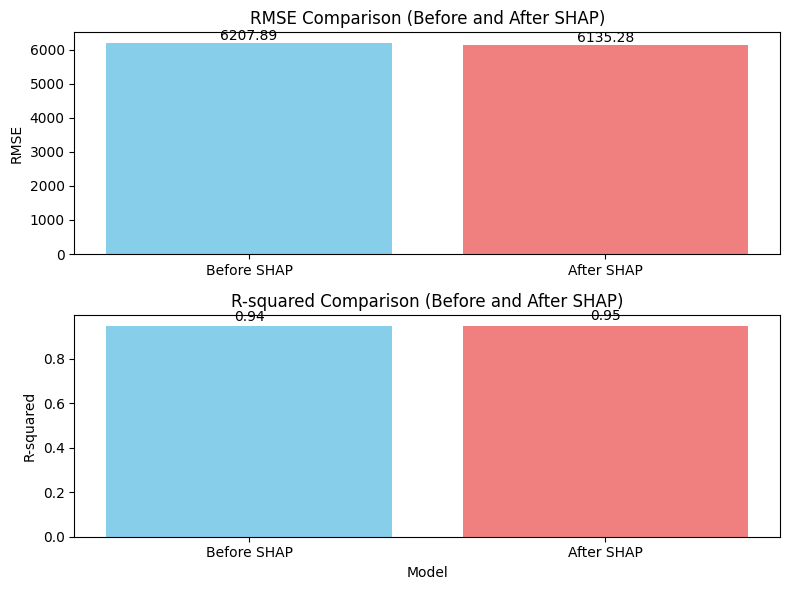

In [ ]:
#visualization of RMSE and R2  before and after applying SHAP feature reduction
models = ['Before SHAP', 'After SHAP']
rmse_values = [rmse_xgb_hpt, rmse_xgb_hpt_shap]
r2_values = [r2_xgb_hpt, r2_xgb_hpt_shap]

#Create the plot
plt.figure(figsize=(8, 6))

#RMSE plot
plt.subplot(2, 1, 1)  #Create a subplot for RMSE
plt.bar(models, rmse_values, color=['skyblue', 'lightcoral'])
plt.title('RMSE Comparison (Before and After SHAP)')
plt.ylabel('RMSE')

#Add value labels above each bar
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')


#R2 plot
plt.subplot(2, 1, 2)  #Create a subplot for R2
plt.bar(models, r2_values, color=['skyblue', 'lightcoral'])
plt.title('R-squared Comparison (Before and After SHAP)')
plt.ylabel('R-squared')
plt.xlabel('Model')

#Add value labels above each bar
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Residual Analysis

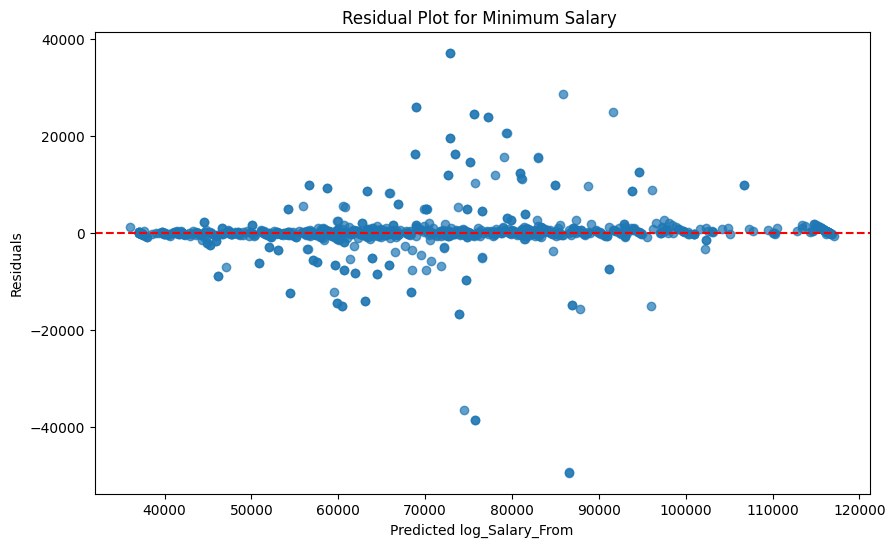

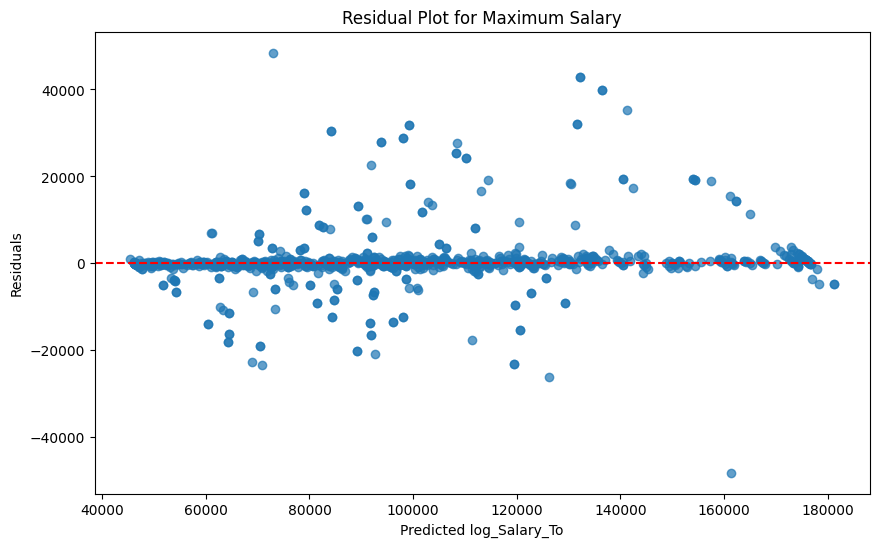

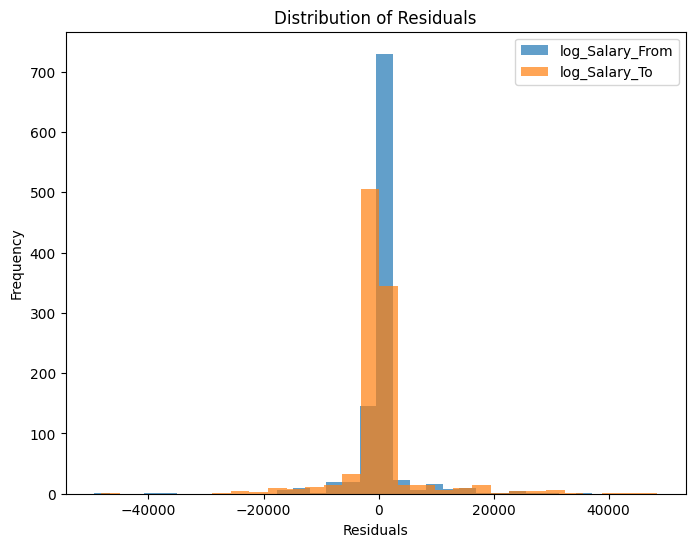

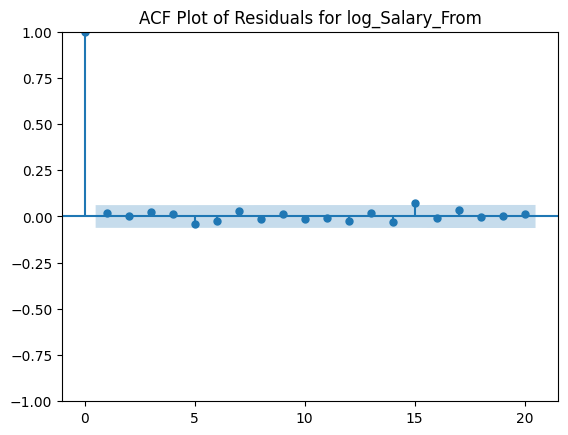

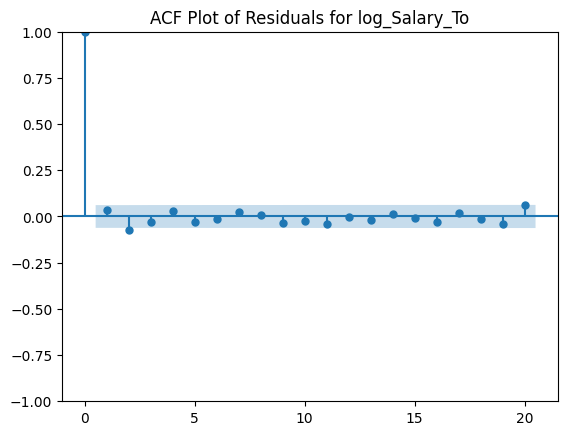

In [ ]:
#Calculate residuals
residuals_xgb = y_test_inv['log_Salary_From'] - y_pred_xgb_hpt_shap_inv[:, 0]
residuals_xgb_to = y_test_inv['log_Salary_To'] - y_pred_xgb_hpt_shap_inv[:, 1]

#Residual plot for 'log_Salary_From'
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb_hpt_shap_inv[:, 0], residuals_xgb, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted log_Salary_From")
plt.ylabel("Residuals")
plt.title("Residual Plot for Minimum Salary ")
plt.show()

#Residual plot for 'log_Salary_To'
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb_hpt_shap_inv[:, 1], residuals_xgb_to, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted log_Salary_To")
plt.ylabel("Residuals")
plt.title("Residual Plot for Maximum Salary")
plt.show()

#Additional residual analysis (example: histogram of residuals)
plt.figure(figsize=(8, 6))
plt.hist(residuals_xgb, bins=30, alpha=0.7, label='log_Salary_From')
plt.hist(residuals_xgb_to, bins=30, alpha=0.7, label='log_Salary_To')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()

#Check for autocorrelation in residuals (example using ACF plot for 'log_Salary_From')
plot_acf(residuals_xgb, lags=20)
plt.title("ACF Plot of Residuals for log_Salary_From")
plt.show()

#Check for autocorrelation in residuals (example using ACF plot for 'log_Salary_From')
plot_acf(residuals_xgb_to, lags=20)
plt.title("ACF Plot of Residuals for log_Salary_To")
plt.show()


#**Export the model**

In [75]:
# Export the model
joblib.dump(best_xgb_shap, 'xgb_hpt.joblib')

['xgb_hpt.joblib']

#**Conclusion**

After applying SHAP-based feature refinement, the tuned XGBoost model showed significant improvement in performance. Initially, the model achieved an RMSE of 6,207.89 and an R² of 0.94, indicating strong predictive accuracy. However, after refining features based on SHAP insights, the model's performance further improved, reducing the RMSE to 6,135.28 and increasing the R² to 0.95, signifying an even stronger fit to the data.


Residual analysis supported this improvement, as the residuals post-SHAP refinement were more tightly clustered around zero, with reduced variance and no noticeable autocorrelation. This confirms that the model's errors became more consistent and unbiased. Additionally, the ACF plots indicated no significant autocorrelation in residuals, and the residual distribution centered more closely around zero, further validating the model's reliability.


Overall, the slight yet meaningful performance enhancement confirms that removing less impactful features identified through SHAP not only simplified the model but also increased its predictive accuracy and efficiency.


# Recommendations



1.   **Deploy the Tuned XGBoost Model**
*   The tuned XGBoost model (after SHAP refinement) demonstrated the best performance with an RMSE of 6,135.28 and R² of 0.95, indicating excellent accuracy and robustness.
*   Deploy this model as the primary solution for predicting salary ranges in job listings.

2.   **Regularly Update and Re-train the Model**
*    Salary trends and job market conditions are dynamic and can change over time.
*    Schedule regular updates and re-training of the model with new job listing data to maintain accuracy and relevance.
3. **Create Salary Benchmark Reports**
* Provide detailed reports highlighting salary ranges by job title, level, and industry to aid in strategic hiring decisions.
* Automate the generation of salary benchmark dashboards for stakeholders to easily access and interpret salary trends.

4. **Monitor Model Performance Post-Deployment**
* Establish a monitoring dashboard to track prediction accuracy over time and trigger re-training as needed.
* Regularly assess model performance using new data and metrics like RMSE and R² to detect any drift.

5. **Leverage Predictive Insights for Budget Planning**
* Use predictive models like the tuned XGBoost to forecast future salary trends and plan recruitment budgets accordingly.
* Allocate resources strategically to attract and retain top talent within expected salary ranges.

6. **Optimize Talent Retention Strategies**
* Utilize model predictions to analyze and forecast salary progression within career levels, ensuring consistent and motivating pay increases.
* Offer salary growth pathways for employees to encourage long-term retention.

7. **Use Data Transparency to Enhance Hiring**
* Share salary ranges openly in job postings to attract qualified candidates and reduce negotiation hurdles.
* Promote salary transparency within the organization to foster trust and equality.

8. **Customize Salary Offers Based on Job Levels and Experience**
* Recognize that higher levels and career stages demand higher salary ranges, as shown by model insights.
* Ensure that compensation packages reflect experience, skills, and industry demands to reduce turnover.

9. **Prepare for Salary Negotiations**
* Equip HR teams with predictive insights to better navigate salary negotiations with candidates and employees.
* Base offers on objective data rather than intuition, leading to more balanced and justified negotiations.

